#### Importanto bibliotecas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

#### Verificação inicial do DF

In [14]:
df = pd.read_csv('train.csv')

df.head(10)

,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,**19.06,29.83,Idoso
1,26.98,1.04,"""167.69""**",69.18,38.5,101.43,100.06,96.11,56.18,36.65,21.99,29.69,"""26,24""",17.99,*27.12,Muito Idoso
2,*8.92//,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14*,26.71,**17.58,"8,82",Jovem
3,34.57,1.02,229.37,NaN,/40.37,/114.93,115.82,"""112.13""",74.4**,NaN,24.03,36.11,31.82,18.79,34.4,Adulto
4,20.26,1.05,224.77,72.41,43.9,NaN,100.57//,106.63,**63.38,41.74,24.67,37.15,33.1,19.8,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,"21,02",27.78,26.1,"""17.59""","26,42",Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.7,65.94,"""""41,96""""",25.61,NaN,30.61,NaN,21.18,Jovem
7,***20.54,1.05,181.44,68.11,"""39.13""",100.19,NaN,102.62,/61.84,NaN,22.51,33.05,28.28,NaN,"/ /20,42",NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.1/,"21,99","""31,56""",NaN,16.73,12.94,Adulto
9,25.3,1.04,198.85,74.21,NaN,105.32,NaN,/106.77,64.04,42.59,23.41,33.2//,30.01,18.41,24.97,Meia-Idade


In [15]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177000 entries, 0 to 176999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AdiposeTissue  147831 non-null  object
 1   Density        158899 non-null  object
 2   Weight         162922 non-null  object
 3   Height         146827 non-null  object
 4   Neck           151861 non-null  object
 5   Chest          140791 non-null  object
 6   Abdomen        150852 non-null  object
 7   Hip            144818 non-null  object
 8   Thigh          147837 non-null  object
 9   Knee           148842 non-null  object
 10  Ankle          146835 non-null  object
 11  Biceps         144819 non-null  object
 12  Forearm        148843 non-null  object
 13  Wrist          155883 non-null  object
 14  BodyFat        177000 non-null  object
 15  Age            152867 non-null  object
dtypes: object(16)
memory usage: 21.6+ MB


#### Problemas encontrados:

 1. Dataframe sujo;
 2. Varias linhas com valores nulos;
 3. Idade como uma variavel categorica e nao numerica;
 4. Os dados da coluna Peso e Altura parecem estar errados ou trocados.

#### Limpando os dados

In [16]:
df_train = df.copy()

# usando regex para limpar as colunas

colunas = df_train.columns.tolist()
print (colunas)

for col in colunas:
    if col == 'Age':
        pass
    elif df_train[col].dtype == 'object':
        df_train[col] = df_train[col].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
        df_train[col] = pd.to_numeric(df_train[col], errors='coerce')


df_train.head(10)


['AdiposeTissue', 'Density', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BodyFat', 'Age']


,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,19.06,29.83,Idoso
1,26.98,1.04,167.69,69.18,38.50,101.43,100.06,96.11,56.18,36.65,21.99,29.69,2624.00,17.99,27.12,Muito Idoso
2,8.92,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14,26.71,17.58,882.00,Jovem
3,34.57,1.02,229.37,NaN,40.37,114.93,115.82,112.13,74.40,NaN,24.03,36.11,31.82,18.79,34.40,Adulto
4,20.26,1.05,224.77,72.41,43.90,NaN,100.57,106.63,63.38,41.74,24.67,37.15,33.10,19.80,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,2102.00,27.78,26.10,17.59,2642.00,Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.70,65.94,4196.00,25.61,NaN,30.61,NaN,21.18,Jovem
7,20.54,1.05,181.44,68.11,39.13,100.19,NaN,102.62,61.84,NaN,22.51,33.05,28.28,NaN,2042.00,NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.10,2199.00,3156.00,NaN,16.73,12.94,Adulto
9,25.30,1.04,198.85,74.21,NaN,105.32,NaN,106.77,64.04,42.59,23.41,33.20,30.01,18.41,24.97,Meia-Idade


In [17]:
# verificar o % de valores nulos por coluna
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Chest,36209,20.457062
Hip,32182,18.181921
Biceps,32181,18.181356
Height,30173,17.046893
Ankle,30165,17.042373
AdiposeTissue,29169,16.479661
Thigh,29163,16.476271
Knee,28158,15.908475
Forearm,28157,15.907910
Abdomen,26148,14.772881


In [18]:
# nulos no meu resultado

nulos_alvo = df_train['BodyFat'].isnull().sum()
print(f"Nulos no alvo (BodyFat): {nulos_alvo}")

Nulos no alvo (BodyFat): 0


In [19]:
# vendo quantidade de nulos por linha

nulos_por_linha = df_train.isnull().sum(axis=1)

print(nulos_por_linha.value_counts())

2    51286
1    39225
3    38221
4    27152
0    14079
5     4022
6     2010
7     1005
Name: count, dtype: int64


In [8]:
df_train.shape

(177000, 16)

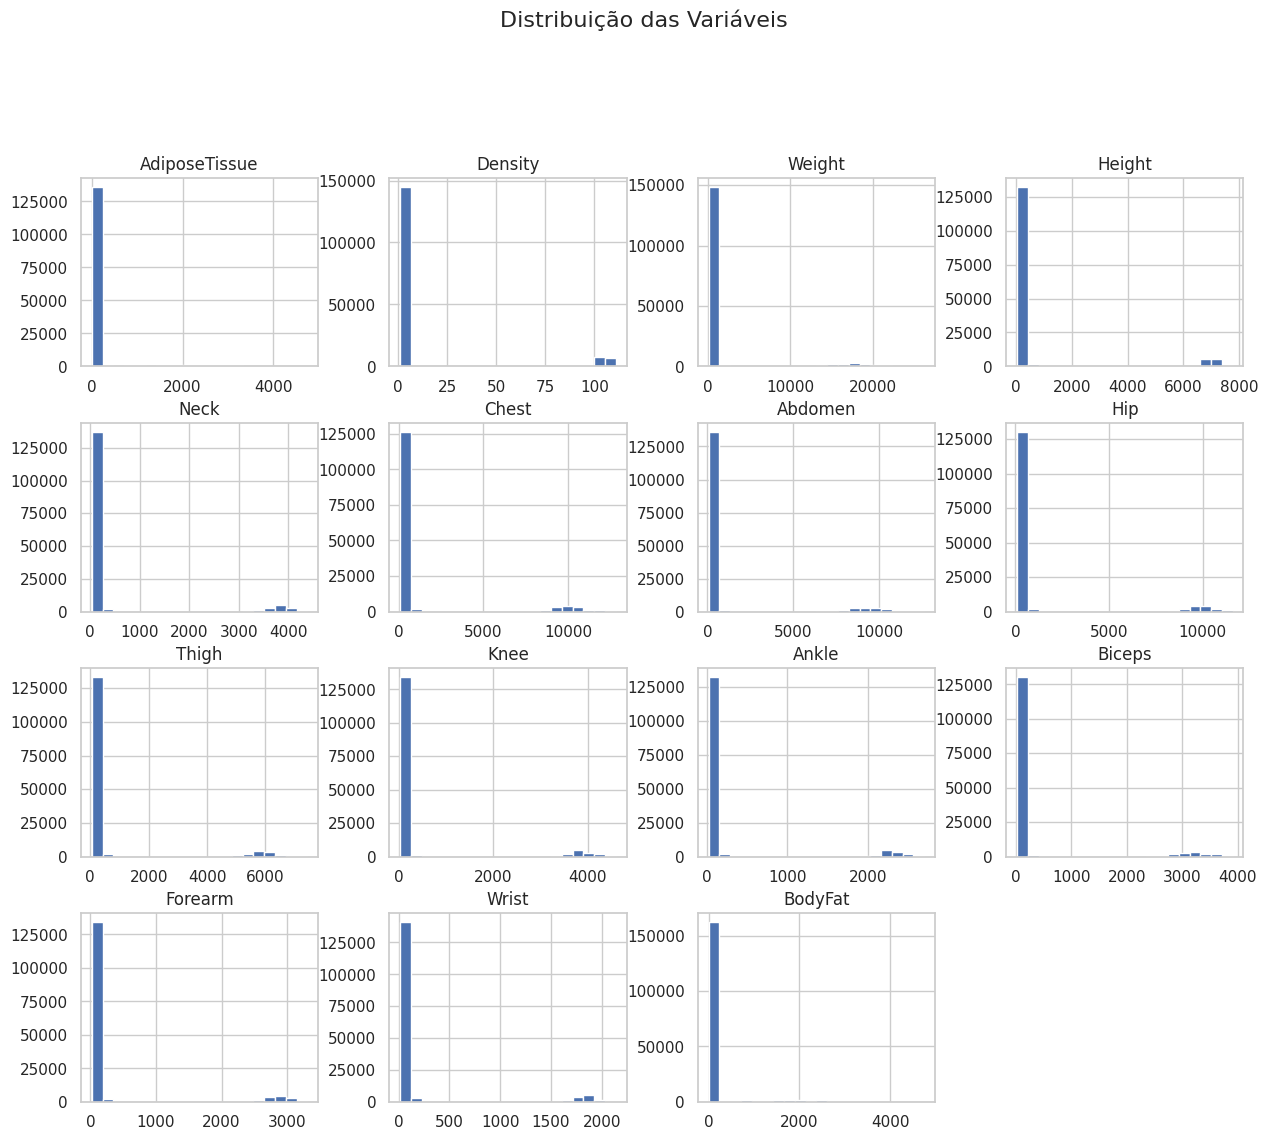

In [ ]:
# verificar distribuição das variáveis numéricas sem tratamento de valores nulos

sns.set(style="whitegrid")
df_train.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis', y=1.02, size=16)
plt.show()